In [17]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [18]:
# Using this to figure out what directory the dataset is in.
os.getcwd()

'/Users/j/Desktop/Capstone_Two'

In [19]:
# This line reads the dataset csv file into a pandas dataframe.
df = pd.read_csv('/Users/j/Desktop/Capstone_Two/adult.data',header=None)

In [20]:
# A brief examination of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
# Renaming the columns so that their names are more descriptive and clear:
df.columns = ['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income']

In [22]:
# Examining the result of renaming the columns.
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


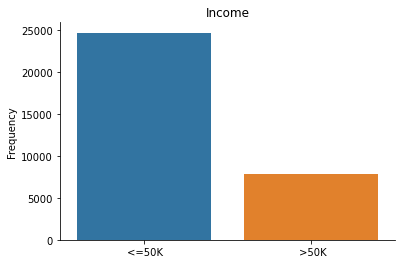

In [23]:
# Since the income column is the column that we want to predict, and is thus one of the most important columns,
# it seems useful to create a count plot of this column just to get a sense of what its values are.
sns.countplot(data=df,
              x='income')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Income')
sns.despine()
plt.show()

In [24]:
# This operation below displays some of the counts of how many members in the dataset had a given age. It is possible
# that age could play a role in predicting income, and it is useful to know if some ages are far more common than 
# others.
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [25]:
# This converts the categorical data in the income column to boolean data, which may make analysis easier.
df['income_bool'] = df.income.apply(lambda x: True if x == ' >50K' else False)

In [26]:
# These following two lines show how different columns vary by age. Looking at this may help explain how increased age
# could influence income.
df2 = df.groupby('age').mean()

In [27]:
df2.head()

,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,income_bool
age,,,,,,
17,185722.232911,6.648101,109.691139,41.751899,21.367089,0.000000
18,193530.207273,8.152727,102.058182,44.336364,25.912727,0.000000
19,204803.543539,9.096910,92.092697,43.915730,30.678371,0.002809
20,198537.705179,9.345286,82.786189,33.298805,32.280212,0.000000
21,200116.997222,9.434722,204.625000,51.636111,34.034722,0.004167


In [28]:
# This gives all the ages in our data:
df2.index

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 90],
           dtype='int64', name='age')

In [29]:
df2.index[1]

18

In [30]:
df2.index[0]

17

In [31]:
df2 = df2.reset_index()

In [32]:
df2.index

RangeIndex(start=0, stop=73, step=1)

In [45]:
# This creates a new variable showing the % of people earning over 50k at each age.
df2['income_bool_pct'] = df2['income_bool'] * 100

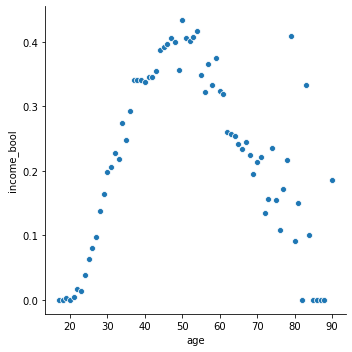

In [34]:
sns.relplot(x='age',y='income_bool',kind='scatter',data=df2)

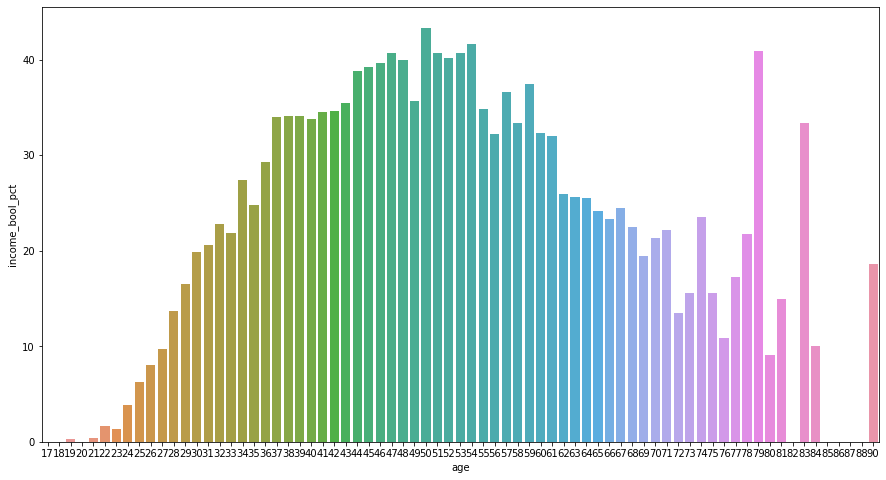

In [35]:
# In our examination of how the variable 'age' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='age',y='income_bool_pct',data=df2)

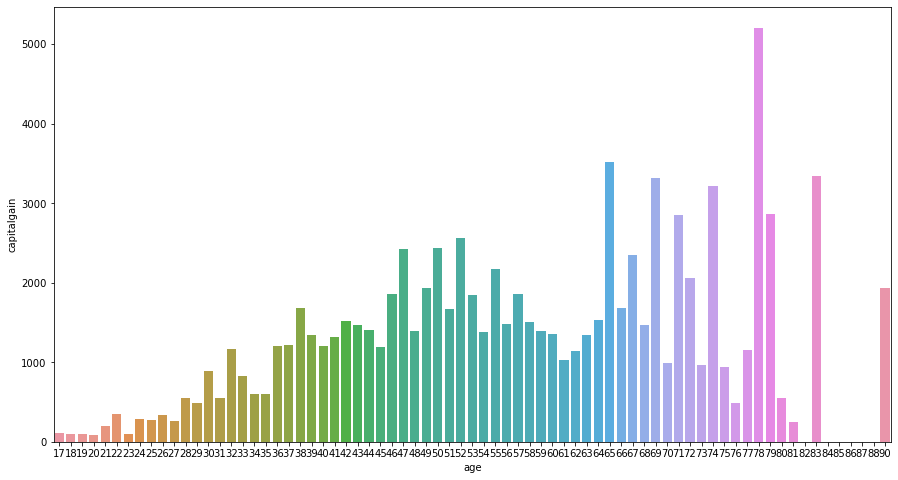

In [56]:
# Looking at explanatory variables more-specifically capitalgain.
plt.figure(figsize=(15,8))
sns.barplot(df2['age'],df2['capitalgain'])

In [58]:
# We can see that the capital gain plot vs age is very similar to the income plot vs age. Perhaps this indicates
# that capital gain would be a very good predictor of income.

In [68]:
capitalgain_info = df['capitalgain'].value_counts()
print(capitalgain_info)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capitalgain, Length: 119, dtype: int64


In [79]:
# This creates a new variable in df showing the % of people earning over 50k at each age.
df['income_bool_pct'] = df['income_bool'] * 100

In [82]:
# The barplot below shows the distribution of income_bool_pct by education. This could be useful in elucidating the 
# relationship between education and income.

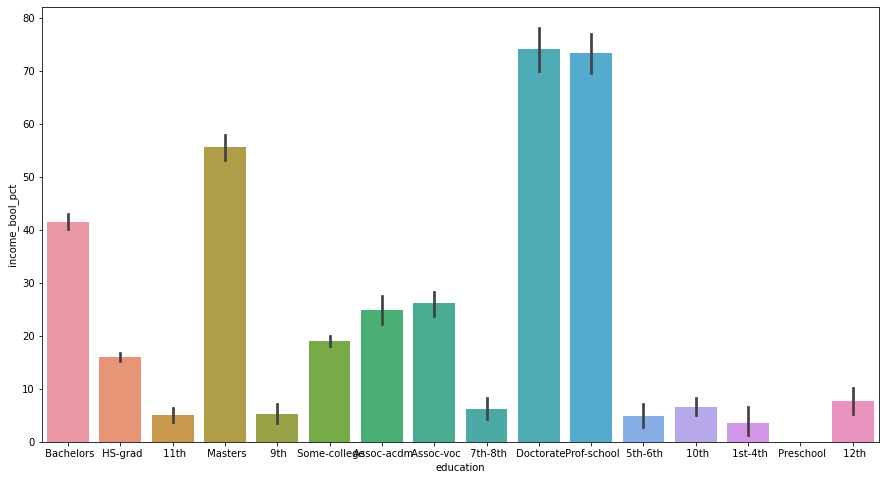

In [81]:
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='income_bool_pct',data=df)

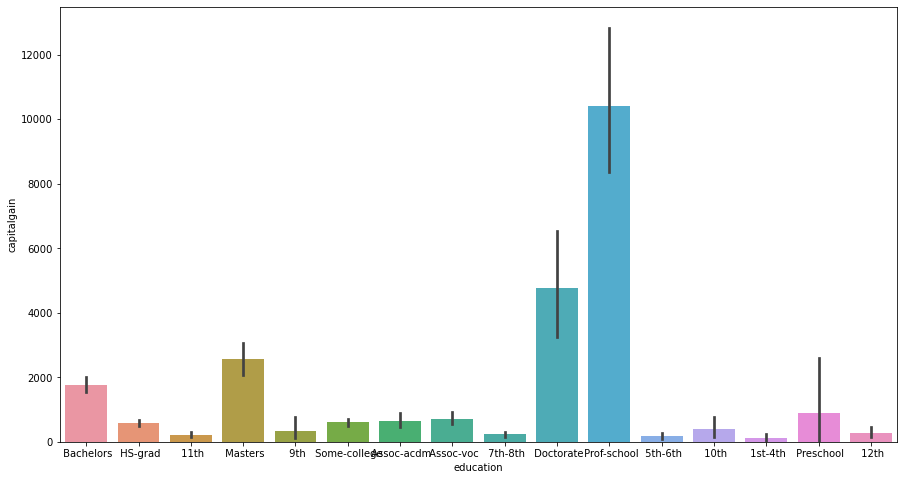

In [76]:
# The barplot below shows the distribution of capital gain by education. This could be useful in elucidating the 
# relationship between education and capital gain.
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='capitalgain',data=df)

In [51]:
# The pairplot below can be useful because it shows visually how different variables are correlated with each other.
# As we can see, capital gain is positively correlated with income_bool_pct, which is what one would naively expect.
# We can also see that hours worked per week peaks with prime working age, and is lower on average for the youngest
# and oldest ages.
# It also appears that educationnum is positively correlated with income_bool_pct.

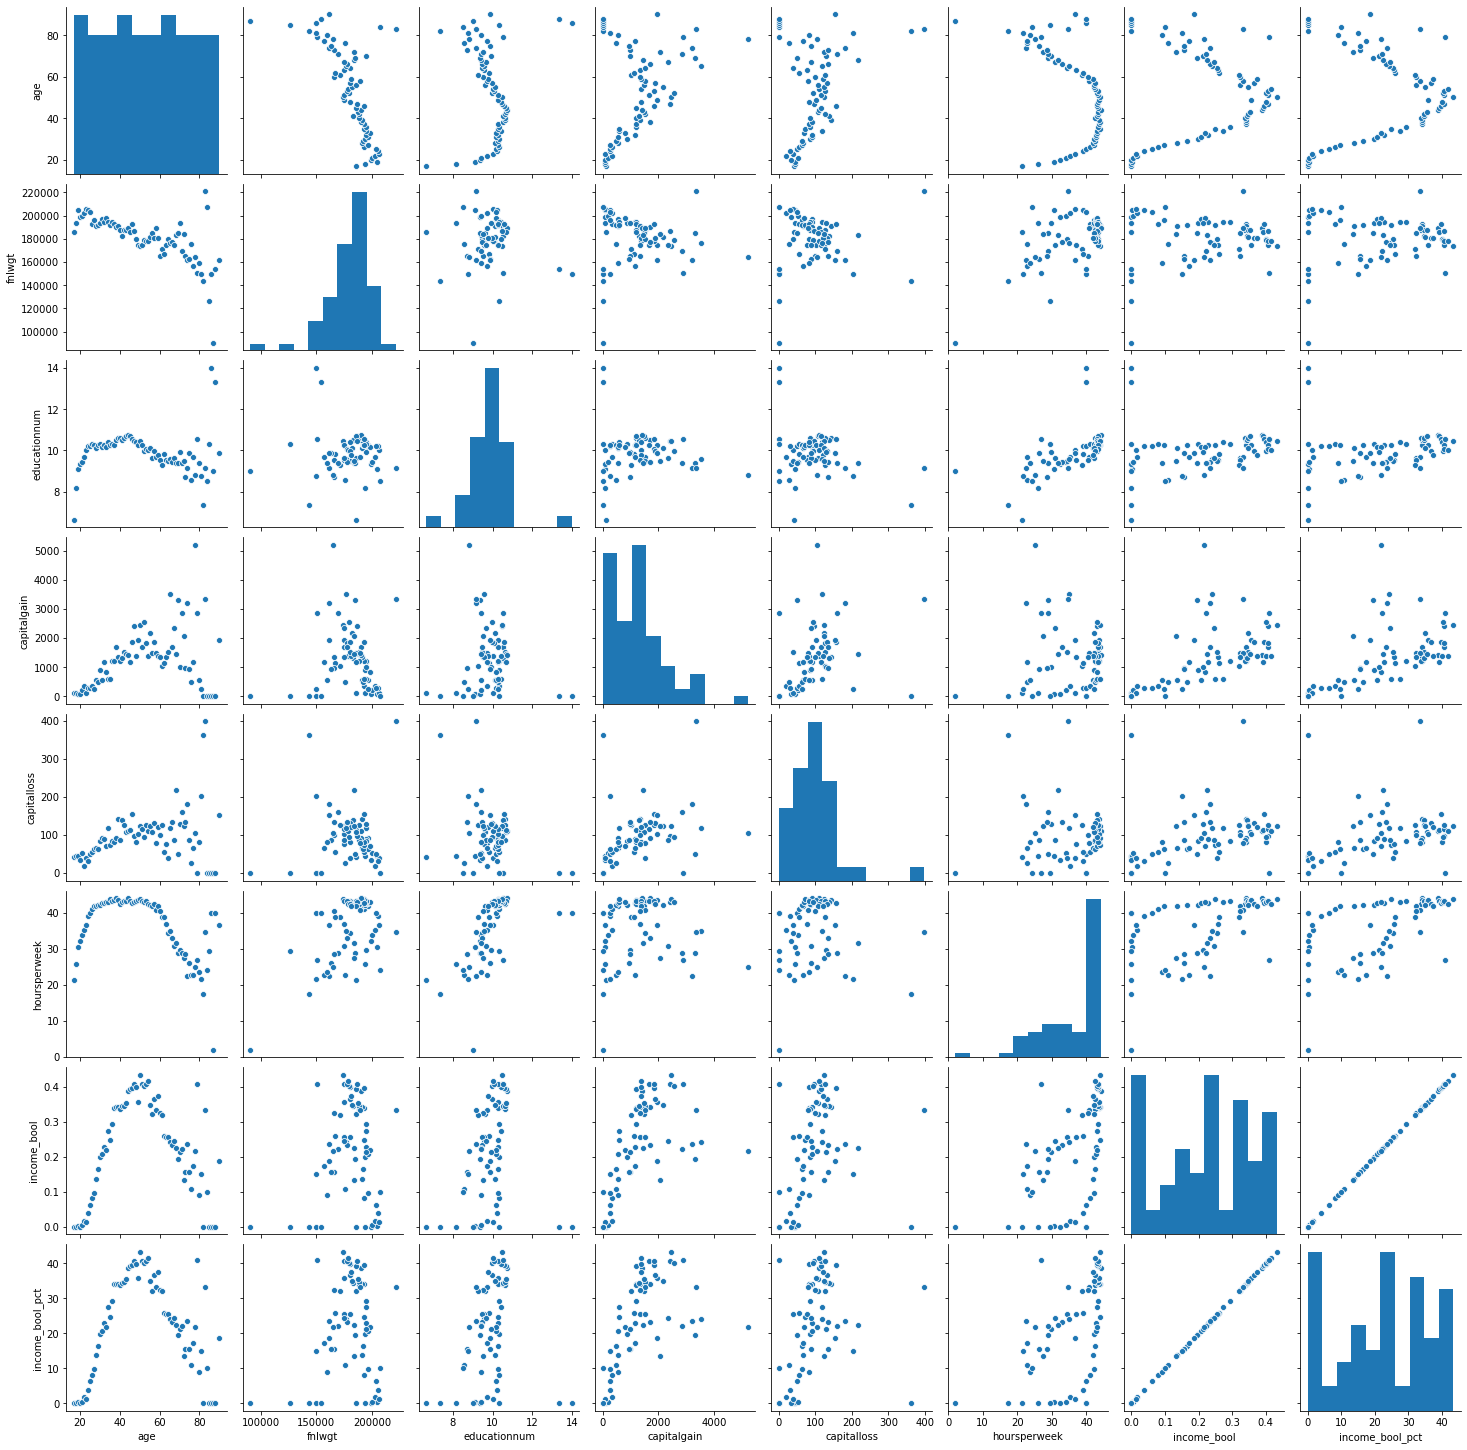

In [36]:
sns.pairplot(df2)